**OBJECTIVES**
1.Basic EDA includes most participated player. Most wins by a team (not only finals).

2.Advance EDA Best performing Players though out the IPL all seasons.

In [5]:
import pandas as pd
import numpy as np 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
match=pd.read_csv('C:/Users/RDX/Desktop/Varun/Machine Learning/Kaggle Projects/IPL Matches 2008-2020.csv')

In [3]:
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match.shape

(816, 17)

In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [7]:
# Importing packages for Predictions
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import tree

In [8]:
print(match.columns)

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')


In [9]:
# Checking match win total null values
match['winner'].isnull().sum()

4

In [10]:
match[match['winner'].isnull()==True]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [11]:
match[match['result']=='tie']
# So far 13 match are tie and we can see eliminator column is having Y 

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon


In [12]:
match.method.unique()

array([nan, 'D/L'], dtype=object)

In [13]:
# Check the no match each team won
match['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [14]:
match['team1'].value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [15]:
match['team2'].value_counts()

Mumbai Indians                 106
Kings XI Punjab                 98
Kolkata Knight Riders           97
Rajasthan Royals                91
Royal Challengers Bangalore     87
Chennai Super Kings             84
Delhi Daredevils                78
Sunrisers Hyderabad             65
Deccan Chargers                 36
Pune Warriors                   23
Delhi Capitals                  14
Gujarat Lions                   14
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: team2, dtype: int64

**Exploratory Data Analysis (EDA)**

In [19]:
# Most wins in IPL
temp = pd.DataFrame({'Winner': match['winner']})

count_win = temp.value_counts()


# creating label : containing team's name
labels= [I[0] for I in count_win.keys()]


bar, ax= plt.subplots(figsize=(10,10))
ax=plt.pie(x=count_win, autopct="%.1f", labels= labels)
plt.title("Wins")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

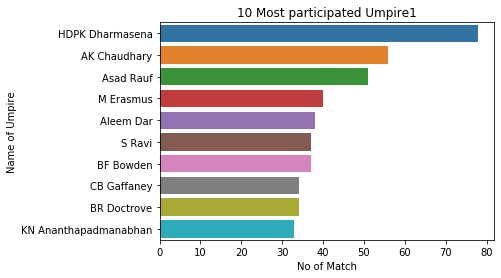

In [20]:
# Top 10 Umpire1 & 2 value count

sns.barplot(x=match['umpire1'].value_counts().head(10).values,
            y=match['umpire1'].value_counts().head(10).index,
            data= match
           )
plt.xlabel("No of Match")
plt.ylabel("Name of Umpire")
plt.title('10 Most participated Umpire1')
plt.show()

In [21]:
# Playing with date
match['Season']= pd.DatetimeIndex(match['date']).year
match.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008


In [22]:
match_per_season = match.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})

# match_per_season
x= match_per_season.Season
y=match_per_season.matches
mps=match_per_season

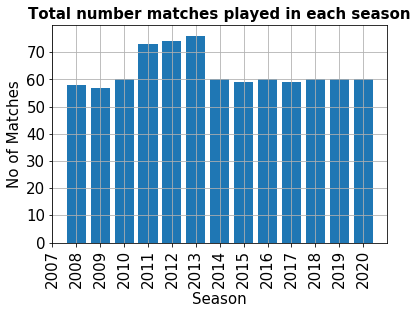

In [23]:
plt.bar(match_per_season.Season, match_per_season.matches)
plt.xticks(rotation=90)
plt.grid(True)
plt.xticks(list(range(1,max(x)+1)),[str(i) for i in range(1,max(x)+1)], fontsize=15) 
plt.yticks(np.arange(0,80,step=10), fontsize=15) 
plt.xlim([2007, 2021]) 
plt.ylim([0, 80])
plt.xlabel("Season", fontsize=15)
plt.ylabel("No of Matches", fontsize=15)
plt.title('Total number matches played in each season', fontsize=15, fontweight = 'bold')
plt.show()

In [28]:
byb=pd.read_csv('C:/Users/RDX/Desktop/Varun/Machine Learning/Kaggle Projects/IPL Ball-by-Ball 2008-2020.csv')

In [29]:
byb.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [30]:
byb.shape

(193468, 18)

In [31]:
byb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [32]:
# Mergring season column with byb using lefet joint
season_data= match[['id','Season']].merge(byb,left_on='id',right_on='id',how='left').drop('id', axis=1)
season_data.head(2)

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [33]:
# total Run scored in each season. Total Season Run= sr
# Avg run per Season. average run =ars
# msp= Match per Season

sr = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
ars= pd.concat([mps,sr.iloc[:,1]],axis=1)
ars['Runs scored per match']=ars['total_runs']/ars['matches']
ars.set_index('Season',inplace=True)

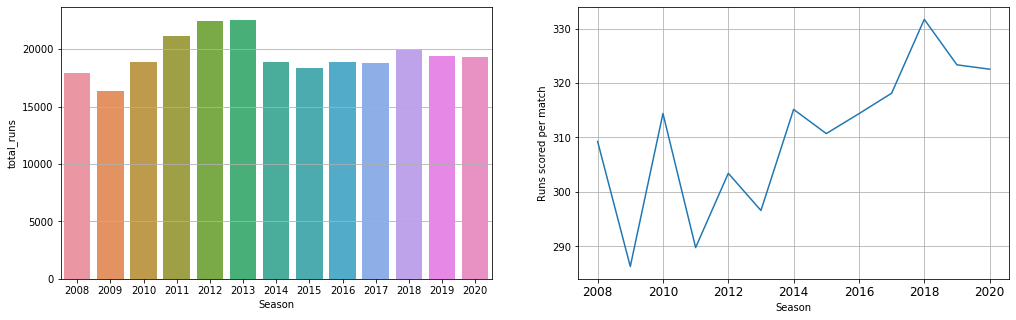

In [34]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(17, 5)
axes[0].grid(True)
axes[1].grid(True)
plt.xticks(fontsize=12)
sns.barplot(x=ars.index,y=ars['total_runs'], data= ars, ax=axes[0]);
sns.lineplot(x=ars.index,y=ars['Runs scored per match'], data= ars, ax=axes[1])

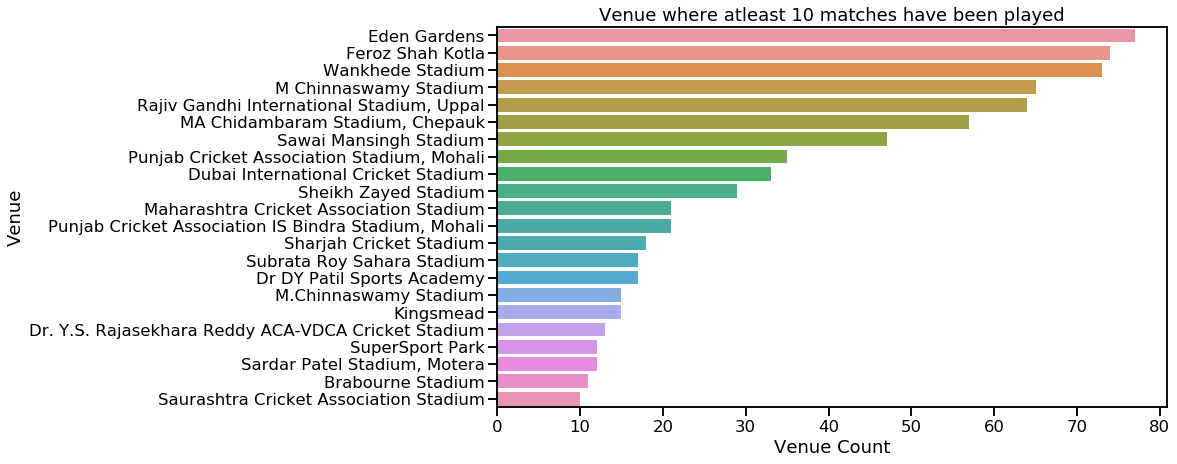

In [35]:
# Venue where atleast 10 matches have been played

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=match['venue'].value_counts().head(22).values,
           y= match['venue'].value_counts().head(22).index,
           data=match)

plt.title('Venue where atleast 10 matches have been played')
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

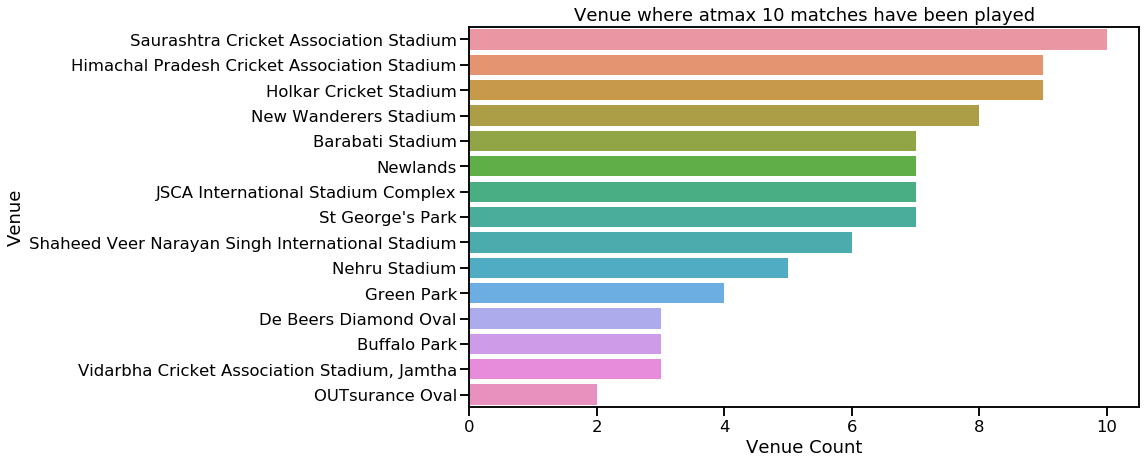

In [36]:
# Venue where atmax 10 matches have been played

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=match['venue'].value_counts().tail(15).values,
           y= match['venue'].value_counts().tail(15).index,
           data=match)

plt.title('Venue where atmax 10 matches have been played')
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

In [37]:
# Which Stadium is best for winning by wickets i.e team fielding won the match
match.venue[match.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [38]:
# Which stadium is best for winning by run i.e bat First
match.venue[match.result=='runs'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

Mode : The mode is the value that appears most frequently in a data set. A set of data may have one mode, more than one mode, or no mode at all

In [39]:
# Which stadium is best for team when they win the toss

# Create a list containing complete team name
t= match['team1'].unique()
for i in t:
    venues= match.venue[match.toss_winner == i][match.winner==i].mode()
    for venue in venues:
        print(venue +' is best for '+ i + ' if they won the toss')
        #print()
    print()

M Chinnaswamy Stadium is best for Royal Challengers Bangalore if they won the toss

Punjab Cricket Association Stadium, Mohali is best for Kings XI Punjab if they won the toss

Feroz Shah Kotla is best for Delhi Daredevils if they won the toss

Wankhede Stadium is best for Mumbai Indians if they won the toss

Eden Gardens is best for Kolkata Knight Riders if they won the toss

Sawai Mansingh Stadium is best for Rajasthan Royals if they won the toss

Barabati Stadium is best for Deccan Chargers if they won the toss
Dr DY Patil Sports Academy is best for Deccan Chargers if they won the toss
Feroz Shah Kotla is best for Deccan Chargers if they won the toss
Kingsmead is best for Deccan Chargers if they won the toss
MA Chidambaram Stadium, Chepauk is best for Deccan Chargers if they won the toss
SuperSport Park is best for Deccan Chargers if they won the toss

MA Chidambaram Stadium, Chepauk is best for Chennai Super Kings if they won the toss

Feroz Shah Kotla is best for Kochi Tuskers Ker

In [40]:
# Which is the best chasing team
match.winner[match.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [41]:
# Which Team won the most no of matches batting 1st
match.winner[match.result=='runs'].mode()

0    Mumbai Indians
dtype: object

In [42]:
match['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [43]:
# Toss Decision
teams= match['toss_winner'].unique()
decision_making=pd.DataFrame([],columns =['Toss Winner','Decision', 'Times'])

for id, element in enumerate(teams):
    temp_bat=match[(match['toss_winner']== element) & (match['toss_decision']== 'bat')]
    temp_field= match[(match['toss_winner']== element)& (match['toss_decision']=='field')]
    
    #append to decision making
    decision_making = decision_making.append({'Toss Winner': element, 'Decision':'bat', 
                                              'Times' :temp_bat['toss_winner'].count()},ignore_index= True)
    
    # For Feild
    decision_making = decision_making.append({'Toss Winner': element, 'Decision':'field', 
                                              'Times' :temp_field['toss_winner'].count()},ignore_index= True)

In [44]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


Toss fig 1


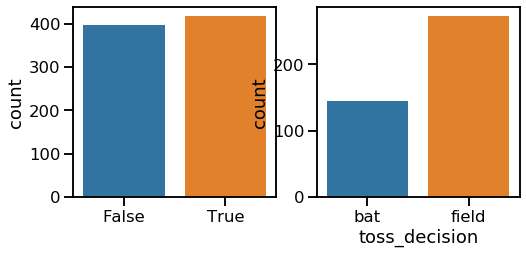

In [45]:
toss= match['toss_winner']==match['winner']
# who won more, 1 who choose batting or the one who choose fielding
decision= match.toss_decision[match.toss_winner==match.winner]

print('Toss fig 1')
f, ax =  plt.subplots(1,2,figsize=(8,3.5))
sns.countplot(toss,ax=ax[0])
sns.countplot(decision ,ax=ax[1])
plt.show()

Toss fig 3


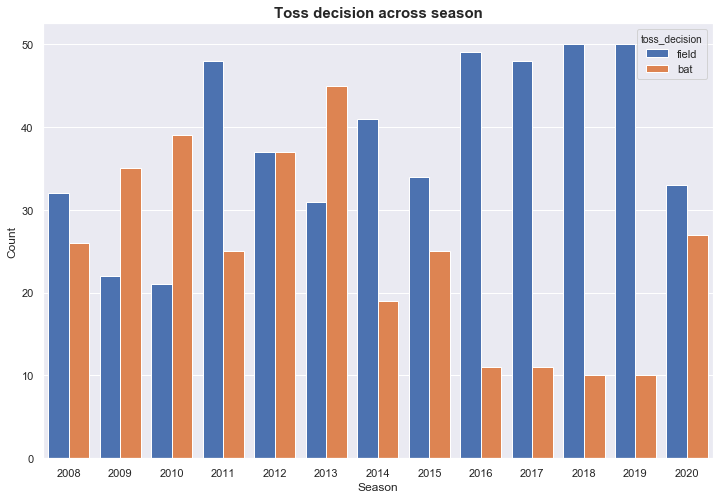

In [47]:
print('Toss fig 3')
ax= plt.axes()
sns.set(rc={'figure.figsize':(15,10)}, style='darkgrid')
ax.set_title('Toss decision across season', fontsize=15, fontweight='bold')
sns.countplot(x='Season', hue='toss_decision' ,data = match, saturation=1)
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

**CONCLUSION**

fig 1 : there is very slight edge to toss winning team. Plus we also observe that team who won toss and choose to field have more chance of winning the match.

fig 3 : There is a trend seen in matches between 2016-2019 where team prefer to choose fielding rather than batting. How ever in 2020 this trend seem to fade.